### Disclaimer: File CSV lengkap dapat diakses melalui link yang tersedia di laporan

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

df1 = pd.read_csv('/content/stress_test_thread_results_20250523_081651.csv')
df2 = pd.read_csv('/content/stress_test_thread_results_20250523_104432.csv')
df3 = pd.read_csv('/content/stress_test_thread_results_20250523_111215.csv')

stress_test_result_thread = pd.concat([df1, df2, df3], ignore_index=True)

stress_test_result_thread.to_csv('/content/stress_test_result_thread.csv', index=False)

# files.download('/content/stress_test_result_thread')
# stress_test_result_thread

In [25]:
df4 = pd.read_csv('/content/stress_test_process_results_20250523_122400.csv')
df5 = pd.read_csv('/content/stress_test_process_results_20250523_134417.csv')
df6 = pd.read_csv('/content/stress_test_process_results_20250523_124256.csv')

stress_test_result_process = pd.concat([df4, df5, df6], ignore_index=True)

stress_test_result_process.to_csv('/content/stress_test_result_process.csv', index=False)

# files.download('/content/stress_test_result_process')
# stress_test_result_process

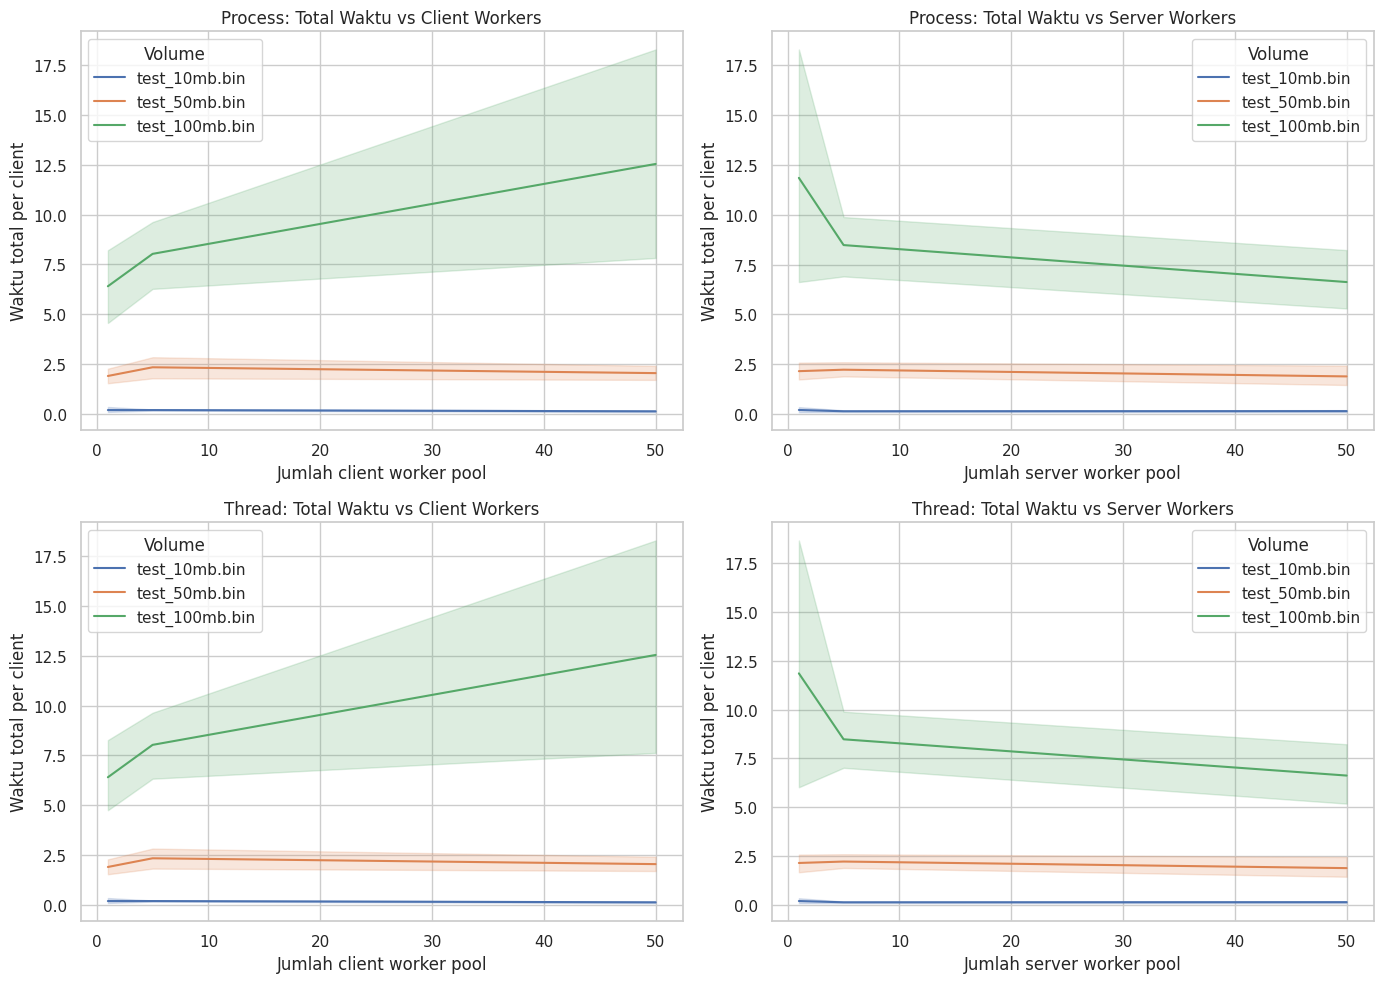

In [26]:
stress_test_result_thread['Model'] = 'Thread'
stress_test_result_process['Model'] = 'Process'

df = pd.concat([stress_test_result_thread, stress_test_result_process], ignore_index=True)

df['Jumlah Client Worker'] = df['Jumlah Client Worker'].astype(int)
df['Jumlah Server Worker'] = df['Jumlah Server Worker'].astype(int)
df['Waktu Total per Client'] = df['Waktu Total per Client (seconds)'].astype(float)

df['Volume'] = df['Volume'].astype(str)

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
volume_list = df['Volume'].unique()

sns.lineplot(
    data=df[df['Model'] == 'Process'],
    x='Jumlah Client Worker',
    y='Waktu Total per Client',
    hue='Volume',
    err_style='band',
    ax=axes[0, 0]
)
axes[0, 0].set_title('Process: Total Waktu vs Client Workers')
axes[0, 0].set_ylabel('Waktu total per client')
axes[0, 0].set_xlabel('Jumlah client worker pool')

sns.lineplot(
    data=df[df['Model'] == 'Process'],
    x='Jumlah Server Worker',
    y='Waktu Total per Client',
    hue='Volume',
    err_style='band',
    ax=axes[0, 1]
)
axes[0, 1].set_title('Process: Total Waktu vs Server Workers')
axes[0, 1].set_ylabel('Waktu total per client')
axes[0, 1].set_xlabel('Jumlah server worker pool')

sns.lineplot(
    data=df[df['Model'] == 'Thread'],
    x='Jumlah Client Worker',
    y='Waktu Total per Client',
    hue='Volume',
    err_style='band',
    ax=axes[1, 0]
)
axes[1, 0].set_title('Thread: Total Waktu vs Client Workers')
axes[1, 0].set_ylabel('Waktu total per client')
axes[1, 0].set_xlabel('Jumlah client worker pool')

sns.lineplot(
    data=df[df['Model'] == 'Thread'],
    x='Jumlah Server Worker',
    y='Waktu Total per Client',
    hue='Volume',
    err_style='band',
    ax=axes[1, 1]
)
axes[1, 1].set_title('Thread: Total Waktu vs Server Workers')
axes[1, 1].set_ylabel('Waktu total per client')
axes[1, 1].set_xlabel('Jumlah server worker pool')

plt.tight_layout()
plt.show()


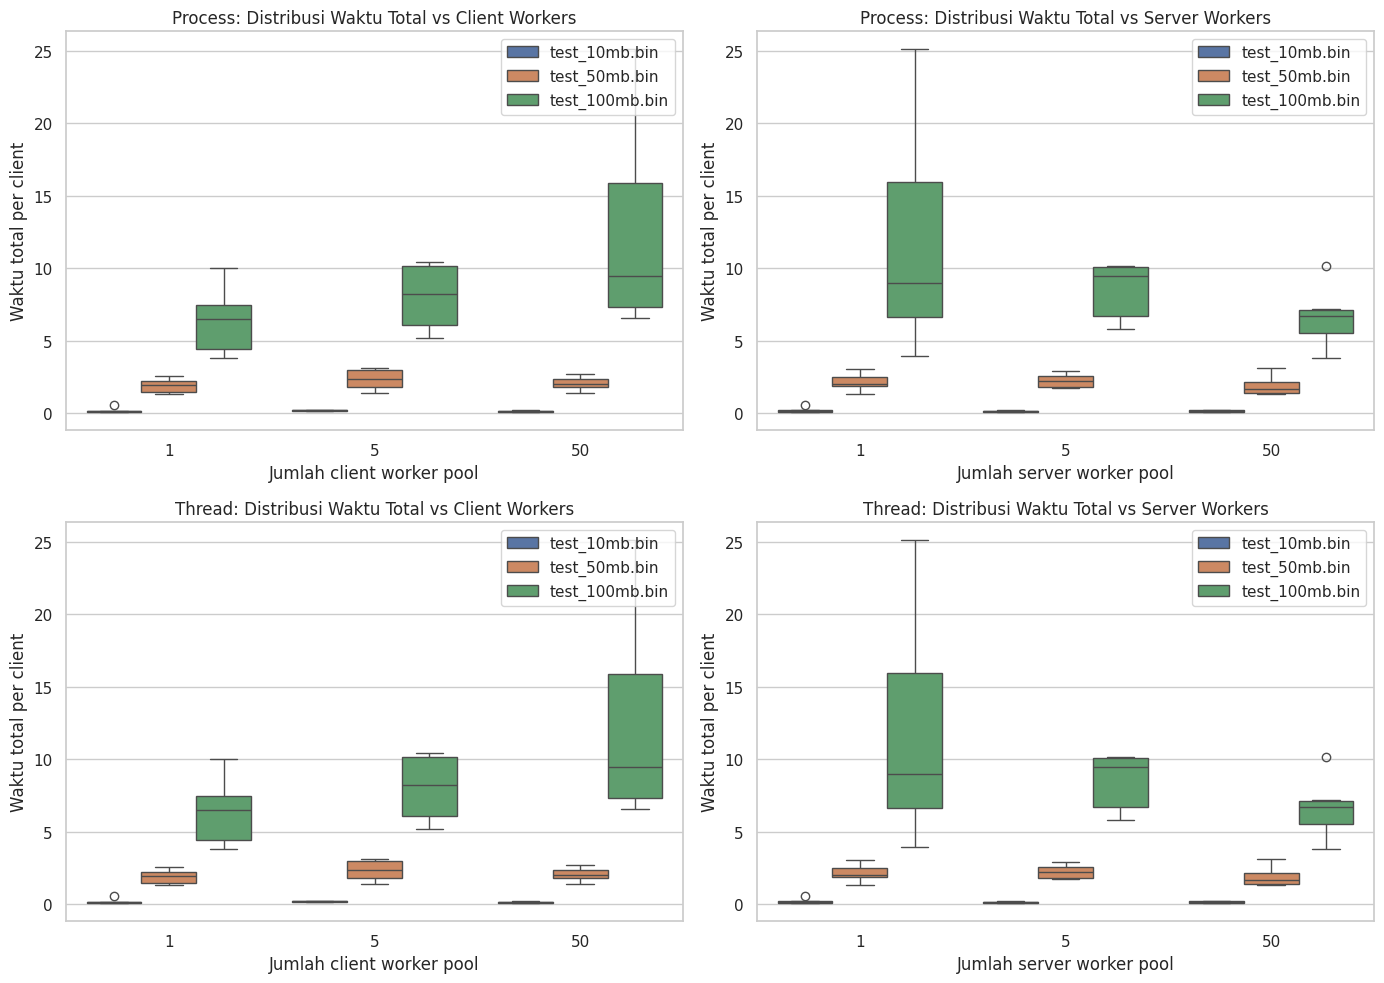

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
volume_list = df['Volume'].unique()

sns.boxplot(
    data=df[df['Model'] == 'Process'],
    x='Jumlah Client Worker',
    y='Waktu Total per Client',
    hue='Volume',
    ax=axes[0, 0]
)
axes[0, 0].set_title('Process: Distribusi Waktu Total vs Client Workers')
axes[0, 0].set_ylabel('Waktu total per client')
axes[0, 0].set_xlabel('Jumlah client worker pool')

sns.boxplot(
    data=df[df['Model'] == 'Process'],
    x='Jumlah Server Worker',
    y='Waktu Total per Client',
    hue='Volume',
    ax=axes[0, 1]
)
axes[0, 1].set_title('Process: Distribusi Waktu Total vs Server Workers')
axes[0, 1].set_ylabel('Waktu total per client')
axes[0, 1].set_xlabel('Jumlah server worker pool')

sns.boxplot(
    data=df[df['Model'] == 'Thread'],
    x='Jumlah Client Worker',
    y='Waktu Total per Client',
    hue='Volume',
    ax=axes[1, 0]
)
axes[1, 0].set_title('Thread: Distribusi Waktu Total vs Client Workers')
axes[1, 0].set_ylabel('Waktu total per client')
axes[1, 0].set_xlabel('Jumlah client worker pool')

sns.boxplot(
    data=df[df['Model'] == 'Thread'],
    x='Jumlah Server Worker',
    y='Waktu Total per Client',
    hue='Volume',
    ax=axes[1, 1]
)
axes[1, 1].set_title('Thread: Distribusi Waktu Total vs Server Workers')
axes[1, 1].set_ylabel('Waktu total per client')
axes[1, 1].set_xlabel('Jumlah server worker pool')

for ax in axes.flat:
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()
